<a href="https://colab.research.google.com/github/richa-daripa/Deep-learning-project/blob/main/Brain_tumor_detection_and_its_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount of Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Functions

In [ ]:
import cv2
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
#from keras.utils import to_categorical
from keras.models import load_model

Data Extraction for detection

In [ ]:
image_directory='/content/drive/MyDrive/Dataset/'
no_tumor_images=os.listdir(image_directory+ 'no/')
yes_tumor_images=os.listdir(image_directory+ 'yes/')
dataset=[]
label=[]
INPUT_SIZE=64
#print(no_tumor_images)
for i , image_name in enumerate(no_tumor_images):
  if(image_name.split('.')[1]=='jpg'):
    image=cv2.imread(image_directory+'no/'+image_name)
    image=Image.fromarray(image, 'RGB')
    image=image.resize((INPUT_SIZE,INPUT_SIZE))
    dataset.append(np.array(image))
    label.append(0)

for i , image_name in enumerate(yes_tumor_images):
  if(image_name.split('.')[1]=='jpg'):
    image=cv2.imread(image_directory+'yes/'+image_name)
    image=Image.fromarray(image, 'RGB')
    image=image.resize((INPUT_SIZE,INPUT_SIZE))
    dataset.append(np.array(image))
    label.append(1)

print(len(dataset))
print(len(label))

dataset=np.array(dataset)
label=np.array(label)

3010
3010


Spliting of Dataset in training and testing

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(dataset, label, test_size=0.2, random_state=0)
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(2408, 64, 64, 3)
(2408,)
(602, 64, 64, 3)
(602,)


Normalization of Data

In [ ]:
x_train=normalize(x_train, axis=1)
x_test=normalize(x_test, axis=1)

Model Building for detection

In [ ]:
from keras.api._v2.keras import metrics
model=Sequential()

model.add(Conv2D(32, (3,3), input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

# Fit the model and save the history
history = model.fit(x_train, y_train, batch_size=16, verbose=1, epochs=12, validation_data=(x_test, y_test), shuffle=False)

model.save('PresenceOfTumorModel.h5')


Epoch 1/12
151/151 [==============================] - 12s 69ms/step - loss: 0.5538 - accuracy: 0.7180 - val_loss: 0.4532 - val_accuracy: 0.7924
Epoch 2/12
151/151 [==============================] - 11s 75ms/step - loss: 0.4267 - accuracy: 0.8160 - val_loss: 0.3630 - val_accuracy: 0.8455
Epoch 3/12
151/151 [==============================] - 12s 79ms/step - loss: 0.3181 - accuracy: 0.8650 - val_loss: 0.3003 - val_accuracy: 0.8621
Epoch 4/12
151/151 [==============================] - 11s 76ms/step - loss: 0.2403 - accuracy: 0.9028 - val_loss: 0.2399 - val_accuracy: 0.9169
Epoch 5/12
151/151 [==============================] - 10s 66ms/step - loss: 0.1698 - accuracy: 0.9435 - val_loss: 0.1936 - val_accuracy: 0.9369
Epoch 6/12
151/151 [==============================] - 12s 80ms/step - loss: 0.1240 - accuracy: 0.9597 - val_loss: 0.1846 - val_accuracy: 0.9319
Epoch 7/12
151/151 [==============================] - 12s 79ms/step - loss: 0.0864 - accuracy: 0.9751 - val_loss: 0.1589 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 activation (Activation)     (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                   

graph showing model accuracy and loss

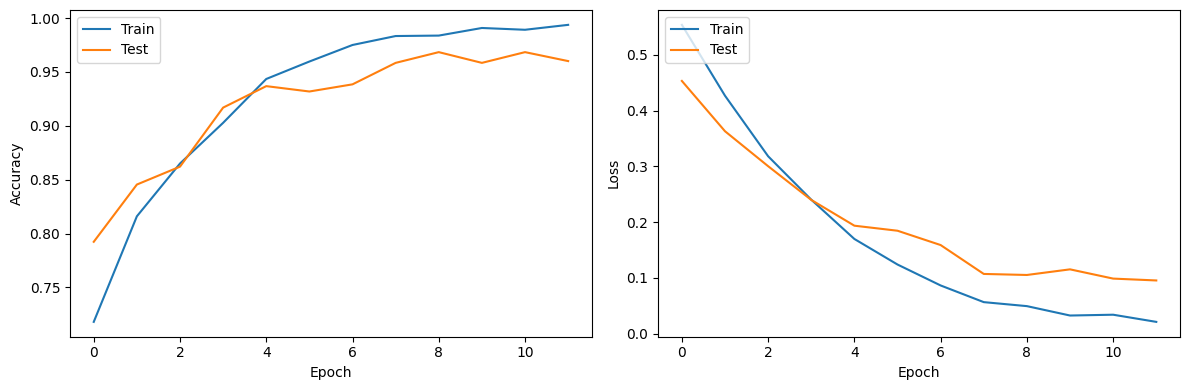

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

Testing Of The Model for detection

1/1 [==============================] - 0s 128ms/step
[[0.]]


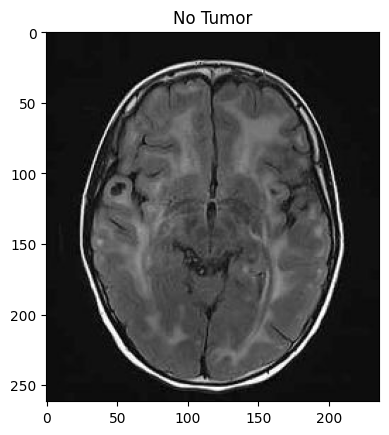

In [ ]:
import matplotlib.pyplot as plt

model=load_model('PresenceOfTumorModel.h5')
image=cv2.imread('/content/drive/MyDrive/pred/pred17.jpg')
img=Image.fromarray(image)
img=img.resize((INPUT_SIZE,INPUT_SIZE))
img=np.array(img)

input_img=np.expand_dims(img,axis=0)
result = model.predict(input_img)
result_final=np.argmax(result,axis=1)
print(result)

result_final = np.round(result)

# Display the image with the appropriate title
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
if result_final[0] == 0:
    plt.title('No Tumor')
else:
    plt.title('Detected Tumor Image')
plt.show()

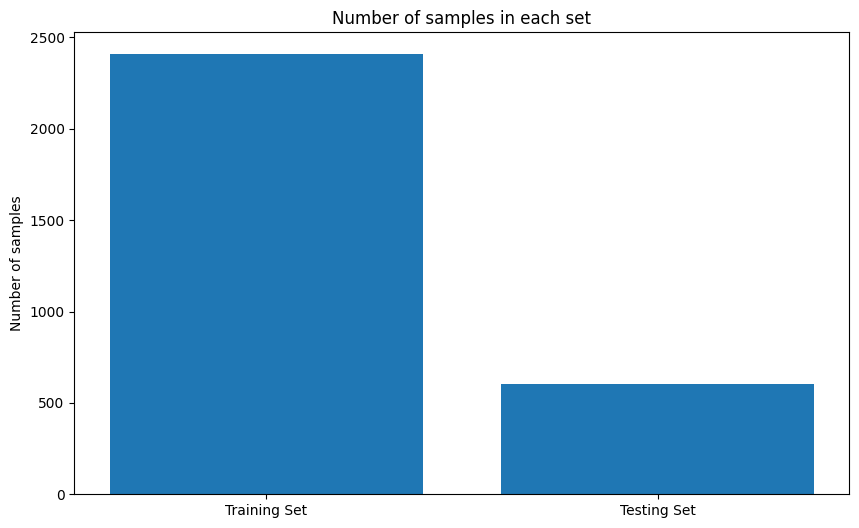

In [ ]:
import matplotlib.pyplot as plt

num_train_samples = len(x_train)
num_test_samples = len(x_test)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(["Training Set",  "Testing Set"], [num_train_samples,  num_test_samples])
plt.title("Number of samples in each set")
plt.ylabel("Number of samples")
plt.show()

Confusion matrix for model's performance on the test data

19/19 [==============================] - 1s 55ms/step


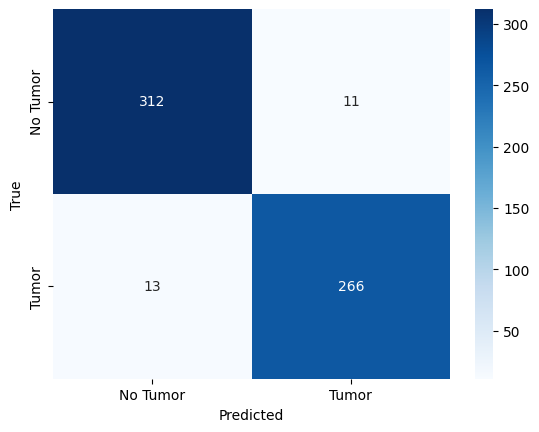

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#making predictions on test data
y_pred_prob = model.predict(x_test)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the labels
labels = ['No Tumor', 'Tumor']

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels,  cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
accuracy = np.trace(cm) / np.sum(cm)
print("Test Accuracy: ", accuracy)

Test Accuracy:  0.9601328903654485


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(312, 11, 13, 266)

In [ ]:
from sklearn.metrics import classification_report

matrix = classification_report(y_test, y_pred)
print('Detection analysis : \n',matrix)

Detection analysis : 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       323
           1       0.96      0.95      0.96       279

    accuracy                           0.96       602
   macro avg       0.96      0.96      0.96       602
weighted avg       0.96      0.96      0.96       602



For classification into two categories

In [ ]:
image_directory = '/content/drive/MyDrive/Dataset/Training/'

# Load the benign and malignant images
benign_images = os.listdir(image_directory + 'Benign/')
malignant_images = os.listdir(image_directory + 'Malignant/')

# Initialize the dataset and label lists
dataset = []
label = []

# Define the input size
INPUT_SIZE = 64

for i, image_name in enumerate(benign_images):
    if image_name.split('.')[1] == 'png':
        image = cv2.imread(image_directory + 'Benign/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((INPUT_SIZE, INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(0)  # Label for benign is 0

for i, image_name in enumerate(malignant_images):
    if image_name.split('.')[1] == 'png':
        image = cv2.imread(image_directory + 'Malignant/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((INPUT_SIZE, INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)  # Label for malignant is 1

print(len(dataset))
print(len(label))

dataset = np.array(dataset)
label = np.array(label)

2400
2400


Model training for classification

In [ ]:
from keras.api._v2.keras import metrics

x_train_clf, x_test_clf, y_train_clf, y_test_clf = train_test_split(dataset, label, test_size=0.3, random_state=0)

# Normalize the training and testing data
x_train_clf = normalize(x_train_clf, axis=1)
x_test_clf = normalize(x_test_clf, axis=1)

# Define the model
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train_clf, y_train_clf, batch_size=16, verbose=1, epochs=15, validation_data=(x_test_clf, y_test_clf), shuffle=False)

Epoch 1/15
105/105 [==============================] - 11s 94ms/step - loss: 0.6725 - accuracy: 0.5738 - val_loss: 0.5958 - val_accuracy: 0.6486
Epoch 2/15
105/105 [==============================] - 7s 71ms/step - loss: 0.4668 - accuracy: 0.7833 - val_loss: 0.3202 - val_accuracy: 0.8861
Epoch 3/15
105/105 [==============================] - 9s 86ms/step - loss: 0.2717 - accuracy: 0.8768 - val_loss: 0.2891 - val_accuracy: 0.8806
Epoch 4/15
105/105 [==============================] - 8s 78ms/step - loss: 0.1934 - accuracy: 0.9220 - val_loss: 0.1383 - val_accuracy: 0.9556
Epoch 5/15
105/105 [==============================] - 8s 76ms/step - loss: 0.1069 - accuracy: 0.9607 - val_loss: 0.1136 - val_accuracy: 0.9528
Epoch 6/15
105/105 [==============================] - 8s 80ms/step - loss: 0.0734 - accuracy: 0.9750 - val_loss: 0.0544 - val_accuracy: 0.9819
Epoch 7/15
105/105 [==============================] - 8s 78ms/step - loss: 0.0391 - accuracy: 0.9893 - val_loss: 0.0411 - val_accuracy: 0.984

In [ ]:
model.save('BenignMalignantModel.h5')

# Load the model for benign vs malignant classification
model_benign_malignant = load_model('BenignMalignantModel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


confusion matrix on test data for classification

23/23 [==============================] - 1s 30ms/step


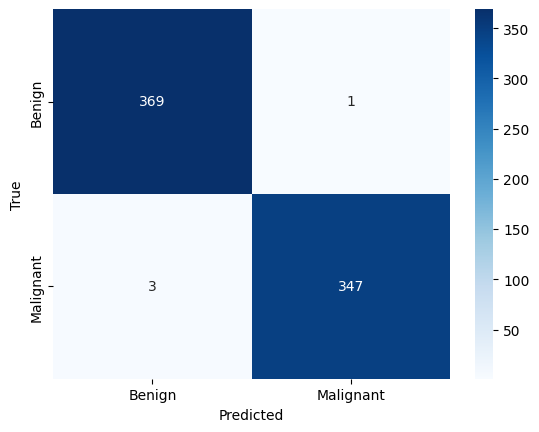

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the test data
y_pred = model_benign_malignant.predict(x_test_clf)
y_pred = np.round(y_pred)  # Round to get 0 or 1

# Compute the confusion matrix
cm = confusion_matrix(y_test_clf, y_pred)

# Define the labels
labels = ['Benign', 'Malignant']

# Display the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

matrix = classification_report(y_test_clf, y_pred)
print('Classification analysis : \n',matrix)

Classification analysis : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       370
           1       1.00      0.99      0.99       350

    accuracy                           0.99       720
   macro avg       0.99      0.99      0.99       720
weighted avg       0.99      0.99      0.99       720



In [ ]:

# Load the image you want to test
image_path = '/content/drive/MyDrive/pred/pred13.jpg'
image = cv2.imread(image_path)

# Preprocess the image
img = Image.fromarray(image, 'RGB')
img = img.resize((INPUT_SIZE, INPUT_SIZE))
img = np.array(img)
input_img = np.expand_dims(img, axis=0)

# Predict whether the image has a tumor using the detection model
detection_result = model.predict(input_img)
detection_result_final = np.round(detection_result)

# If a tumor is detected, classify it as benign or malignant using the classification model
if detection_result_final[0] == 1:
    classification_result = model_benign_malignant.predict(input_img)
    classification_result_final = np.round(classification_result)
    if classification_result_final[0] == 0:
        plt.title('Benign Tumor')
    else:
        plt.title('Malignant Tumor')
else:
    plt.title('No Tumor detected')

# Display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

filename = os.path.basename(image_path)

print("Filename: ", filename)

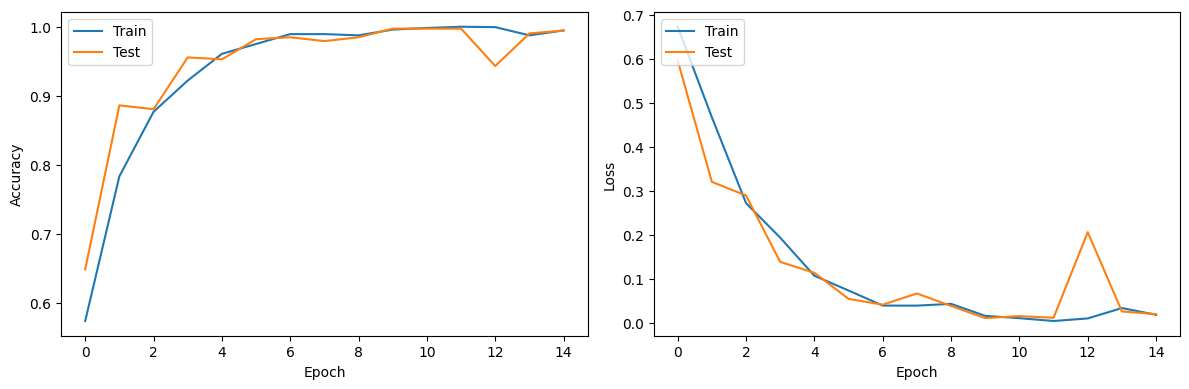

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()